#Project 4: Logistic Regression Model Implementation and Evaluation for Binary Classification
**Project Title: Binary Classification Model Development: Logistic Regression for Survival Prediction**

**Project Goal:** To implement, train, and comprehensively evaluate a Logistic Regression model for a binary classification task, specifically predicting passenger survival on the Titanic dataset. This project emphasizes understanding model performance through various classification metrics and diagnostic visualizations.
Objectives:
1.	Dataset Utilization:
o	Utilize the preprocessed and feature-engineered Titanic dataset (from a prior project or a similarly prepared dataset) as input for model training and evaluation. Ensure the target variable ('Survived') is appropriately defined as binary.
2.	Logistic Regression Model Implementation:
o	Train a Logistic Regression model on the prepared dataset.
o	Ensure proper handling of features and the target variable for binary classification.
3.	Performance Metric Calculation:
o	Calculate and report a suite of essential classification performance metrics on the test set to thoroughly assess model effectiveness:
	Accuracy: The proportion of correctly classified instances.
	Precision: The proportion of true positive predictions among all positive predictions.
	Recall (Sensitivity): The proportion of true positive predictions among all actual positive instances.
	F1-score: The harmonic mean of precision and recall, providing a balanced measure.
4.	Model Diagnostics and Visualization:
o	Generate key visualizations to interpret model performance and decision-making:
	Confusion Matrix: Plot a confusion matrix to visualize the counts of true positives, true negatives, false positives, and false negatives.
	Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC): Plot the ROC curve and report its corresponding AUC score. This assesses the model's ability to discriminate between classes across various classification thresholds.
Tools/Libraries:
•	Python 3.x
•	Pandas (for data handling)
•	NumPy (for numerical operations)
•	Scikit-learn (for model training, metrics, and plotting: LogisticRegression, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay)
•	Matplotlib / Seaborn (for enhanced visualizations)
Deliverables:
•	A well-structured and commented Python script (.py or .ipynb) encompassing all steps from model training to evaluation and visualization.
•	Clear output of all calculated performance metrics (accuracy, precision, recall, F1-score).
•	High-resolution image files (e.g., .png) of the generated confusion matrix and ROC curve.
•	A concise interpretation of the model's performance based on the metrics and visualizations, including insights from the confusion matrix and AUC score.
Success Criteria:
•	The Logistic Regression model is successfully trained.
•	All specified performance metrics are accurately calculated and reported.
•	The confusion matrix and ROC curve are correctly generated and visually interpretable.
•	The code is robust, readable, and adheres to standard coding practices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

###1_Loading Preprocessed Titanic Data Set

In [ ]:
df = pd.read_csv("/content/titanic_preprocessed.csv")

In [ ]:
df.head()

,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,-0.565736,0.014151,0.0,1.0,1.0,2,0.0,1.0,0.0,0.0
1,1,1,0.663861,0.139136,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0
2,1,3,-0.258337,0.015469,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0
3,1,1,0.433312,0.103644,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0
4,0,3,0.433312,0.015713,0.0,1.0,1.0,1,0.0,1.0,0.0,0.0


So above is the preprocessed data of titanic data set.

###Step 2: Prepare the Data for Modeling

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###Step 3: Logistic Regression Model Implementation

In [ ]:
#importing model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Fit the model.
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Making Predictions.
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

* .predict() → Predict survival (0 or 1).

* .predict_proba() → Predict the probability of survival (needed for ROC curve).

In [ ]:
print(y_pred[:10])

[0 0 0 0 0 0 0 1 0 1]


In [ ]:
model.predict_proba(X_test)[:10]

array([[0.80963166, 0.19036834],
       [0.88359675, 0.11640325],
       [0.85966602, 0.14033398],
       [0.91107654, 0.08892346],
       [0.95250189, 0.04749811],
       [0.81730394, 0.18269606],
       [0.78744477, 0.21255523],
       [0.06207693, 0.93792307],
       [0.91966851, 0.08033149],
       [0.14559901, 0.85440099]])

Above we can see two things the predict function only showing the 0,1 on basisi of prepability mean is >0.5 it will survived and if less not survived and in predict_proba it show each propability on the base it show us 0 and 1.

###Step 4: Calculate Performance Metrics

Here according to the task we will check the accuracy of model prediction there are different methods are listed in the task so i will use them one by one.

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Accuracy means: Out of all passengers, how many we predicted correct.

Accuracy: 0.8059701492537313


as we see there are 80% correct predictions.

In [ ]:
# Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Precision means: When model says 'survived', how many are really survived.

Precision: 0.7628865979381443


In [ ]:
# Recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Recall means: Out of all real survivors, how many we found correctly.

Recall: 0.7184466019417476


In [ ]:
# F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# F1-score means: Balance between precision and recall.

F1-score: 0.74


###Step 5: Confusion Matrix Visualization
The confusion matrix is a table that shows how many predictions were correct or wrong, split into categories:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

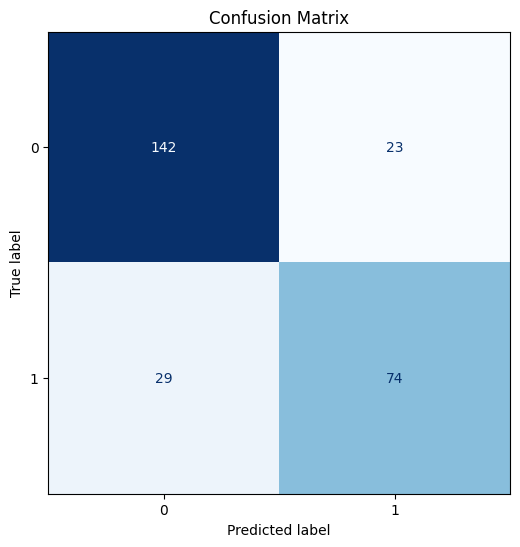

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.show()


142 (TN) → Correctly predicted non-survivors.

23 (FP) → Model predicted “survived” but they didn’t survive.

29 (FN) → Model predicted “did not survive” but they actually survived.

74 (TP) → Correctly predicted survivors.

The model correctly predicted 142 passengers who did not survive and 74 passengers who did survive.
It made 23 mistakes by saying passengers survived when they did not, and 29 mistakes by saying passengers did not survive when they actually did.
This means the model is better at finding people who did not survive than finding survivors, but overall it makes a good number of correct predictions.

###Step 6:ROC Curve & AUC Score

“Plot the ROC curve and report its AUC score to see how well the model can tell survivors from non-survivors.”

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay



In [ ]:
# Step 1: Get ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


In [ ]:
# Step 2: Get AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.8747572815533982


In [ ]:
# Step 3: Plot ROC Curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name="Logistic Regression")

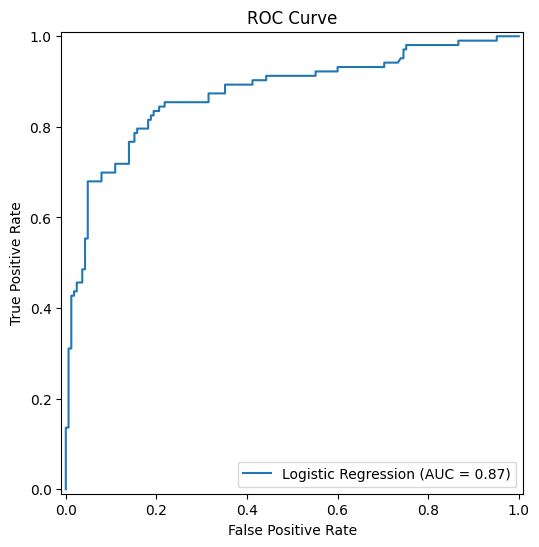

In [ ]:

fig, ax = plt.subplots(figsize=(8, 6))
roc_display.plot(ax=ax)
plt.title("ROC Curve")
plt.show()

**Interpretation**:
The ROC curve shows how well the model can separate survivors from non-survivors at different probability thresholds. Our AUC score is 0.87, which is close to 1. This means the model has a high ability to correctly distinguish between people who survived and those who did not. A value above 0.8 is considered very good, so our model performs well in classification.